In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as animation
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps#float32
from sklearn.decomposition import FactorAnalysis
from sklearn.manifold import Isomap

In [2]:
# Load spike data
spike_data = np.load('../data/data_smooth_W20L50k.npy')                      
spike_data_t = spike_data[:,0:1000]
print(np.shape(spike_data))

# short time span
t = np.shape(spike_data_t)[1]
n = np.shape(spike_data)[0]


(336, 10000)


In [3]:
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(spike_data_t)) #scaling the data
scaled=pd.DataFrame.to_numpy(scaled_data)

(336, 20)
(336, 20)
(336, 20)
(20,)


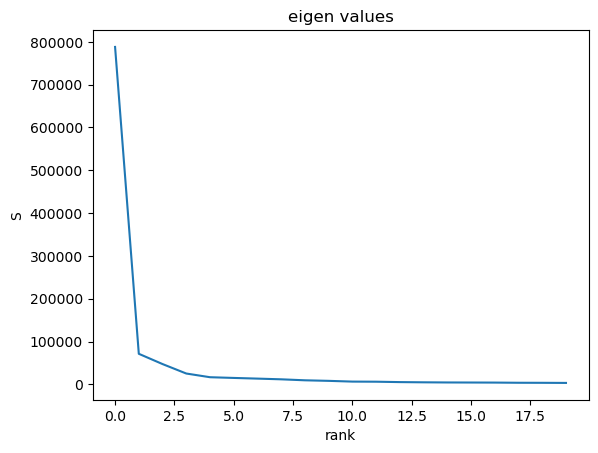

In [4]:
#Applying Isomap

#Taking no. of Principal Components r
r = 20
Iso = Isomap(n_components = r)



# X = USV'
iso = Iso.fit_transform(scaled_data) # = US


#print(iso)
print(iso.shape)

emb = Iso.embedding_
#print(emb)
print(emb.shape)

Kpca = Iso.kernel_pca_
#print(Kpca)
s = Kpca.eigenvectors_ # S
print(s.shape)
e = Kpca.eigenvalues_ # S
print(e.shape)
fig, ax = plt.subplots()
ax.plot(e)

ax.set(xlabel='rank', ylabel='S',
       title='eigen values')
plt.show()

In [5]:
print(iso)

[[ 33.79172536  24.81761167 -11.70904501 ...   0.2594184    4.53520325
   10.13589938]
 [  4.03239181  20.8116395  -11.51819308 ...  -7.3422056    7.7711252
    0.71439131]
 [ 23.84595052  29.17332544 -15.96946763 ...   1.7732288    6.34678832
    0.82782339]
 ...
 [-26.74402569  -7.40384748   1.0641831  ...   0.22134984   0.25907155
    0.16132836]
 [-26.74402569  -7.40384748   1.0641831  ...   0.22134984   0.25907155
    0.16132836]
 [-26.74402569  -7.40384748   1.0641831  ...   0.22134984   0.25907155
    0.16132836]]


In [6]:
#spike__projected = np.linalg.inv(E)@s.T@scaled_data
spike_projected = s.T@scaled_data
spike__projected = pd.DataFrame.to_numpy(spike_projected)

#print(spike_projected.T)

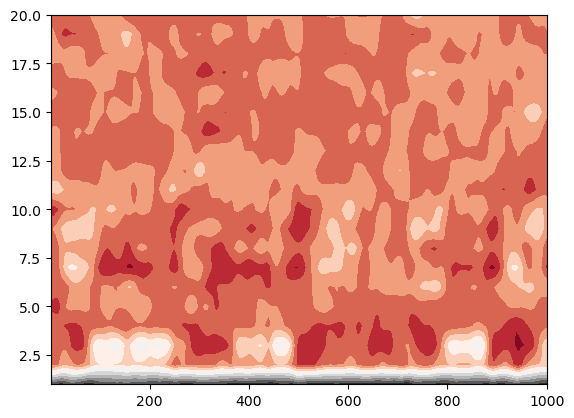

In [7]:
dims=r
time = np.linspace(1, 1000, 1000)
neurons = np.linspace(1, dims, dims)
#print(time.shape)
#print(time)
#print(neurons.shape)
#print(neurons)
T, N = np.meshgrid(time, neurons)


plt.contourf(T, N, spike__projected[0:dims,:], 10, cmap='RdGy')

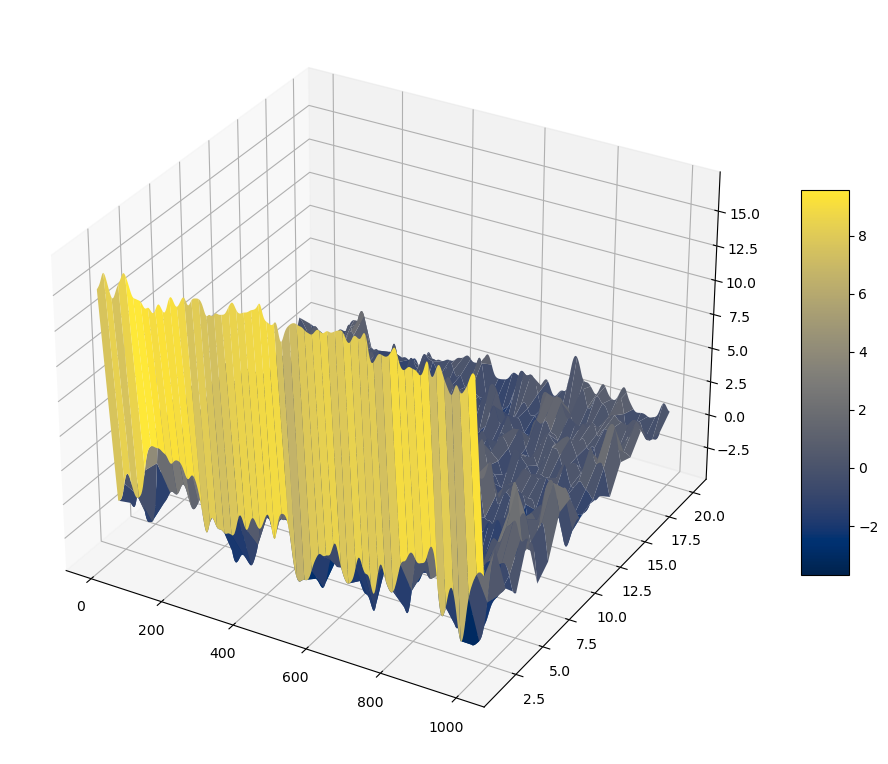

In [8]:
#%matplotlib qt
dims=r
time = np.linspace(1, 1000, 1000)
neurons = np.linspace(1, dims, dims)
T, N = np.meshgrid(time, neurons)

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(T, N, spike__projected[0:dims,:], cmap = plt.cm.cividis)
# Set axes label
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)
#ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [9]:
# reconstruct data
rank = 20
s_r = s[:,:rank]
spike__reconstructed = s@s.T@scaled_data
spike_reconstructed = pd.DataFrame.to_numpy(spike__reconstructed)
print(spike_reconstructed)
print(scaled)

[[ 0.56540292  0.54068233  0.51486869 ...  0.15449034  0.15486132
   0.15762973]
 [ 0.13395113  0.14450256  0.15493466 ...  0.2984907   0.30374045
   0.30942684]
 [ 0.63385747  0.64035582  0.64731825 ... -0.29791359 -0.36241729
  -0.42307192]
 ...
 [-0.41389943 -0.41645557 -0.4191746  ... -0.55537714 -0.55158217
  -0.54765802]
 [-0.41389943 -0.41645557 -0.4191746  ... -0.55537714 -0.55158217
  -0.54765802]
 [-0.41389943 -0.41645557 -0.4191746  ... -0.55537714 -0.55158217
  -0.54765802]]
[[-0.14495034 -0.17184927 -0.19773811 ... -0.18000705 -0.20305631
  -0.22431419]
 [-0.25903119 -0.25619775 -0.25448011 ... -0.28971721 -0.27459639
  -0.25295622]
 [ 1.20141377  1.26398498  1.32764595 ... -0.27920702 -0.32128252
  -0.35797185]
 ...
 [-0.45767411 -0.45931959 -0.46106096 ... -0.56493977 -0.56330364
  -0.56153552]
 [-0.45767411 -0.45931959 -0.46106096 ... -0.56493977 -0.56330364
  -0.56153552]
 [-0.45767411 -0.45931959 -0.46106096 ... -0.56493977 -0.56330364
  -0.56153552]]


In [12]:
from mpl_toolkits.mplot3d.axes3d import get_test_data
from matplotlib import cm
%matplotlib qt
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title('Original data')
time = np.linspace(1, 1000, 1000)
neurons = np.linspace(1, 336, 336)


T, N = np.meshgrid(time, neurons)
#surf = ax.plot_surface(T, N, spike_data[:,0:1000], cmap = plt.cm.cividis)
surf = ax.plot_surface(T, N, scaled[:,0:1000], cmap = plt.cm.cividis)

fig.colorbar(surf, shrink=0.5, aspect=8)

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title('Reconstructed data')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
surf = ax.plot_surface(T, N, spike_reconstructed, cmap = plt.cm.cividis)
fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()